# Sentiment/Opinion Analysis or Customer Feedback

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [10]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [13]:
data.Liked.unique()

array([1, 0], dtype=int64)

In [14]:
data.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [15]:
data.Review.value_counts()

I won't be back.                                                                                                            2
The food was terrible.                                                                                                      2
I love this place.                                                                                                          2
I would not recommend this place.                                                                                           2
The ambiance was incredible.                                                                                                1
                                                                                                                           ..
very slow at seating even with reservation.                                                                                 1
But I definitely would not eat here again.                                                                            

In [16]:
data.Liked.value_counts(normalize = True)*100

1    50.0
0    50.0
Name: Liked, dtype: float64

In [17]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text):

    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 550, height = 550, 
                           background_color ='white', 
                           min_font_size = 12).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 

    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # show plot
    plt.show()

In [18]:
paragraph=' '.join(data.Review.tolist())
paragraph

'Wow... Loved this place. Crust is not good. Not tasty and the texture was just nasty. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. Now I am getting angry and I want my damn pho. Honeslty it didn\'t taste THAT fresh.) The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. The fries were great too. A great touch. Service was very prompt. Would not go back. The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! I was disgusted because I was pretty sure that was human hair. I was shocked because no signs indicate cash only. Highly recommended. Waitress was a little slow in service. This place is not worth your time, let alone Vegas. did not like at all. The Burrittos Blah! The food, amazing. Service is also cute. I could care l

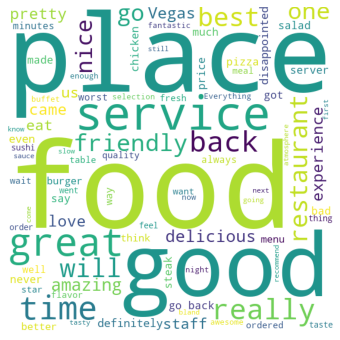

In [19]:
word_cloud(paragraph)

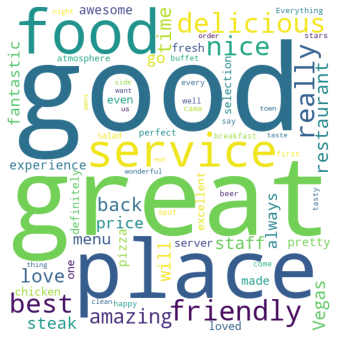

In [20]:
paragraph = ''.join(data[data.Liked==1].Review.tolist())
word_cloud(paragraph)

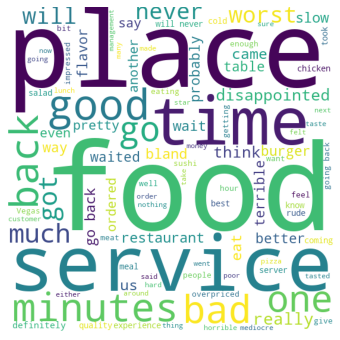

In [21]:
paragraph = ''.join(data[data.Liked==0].Review.tolist())
word_cloud(paragraph)

#  Bag of words  , vectors word frequency (count)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from data like symbols

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(data['Review'])

In [24]:
text_counts.shape

(1000, 1834)

In [34]:
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
count_df

,00,1,10,100,11,12,15,17,1979,2,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                    data['Liked'], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [27]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

In [28]:
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7333333333333333


In [29]:
# Transform into matrix
val=cv.transform(["Service of the restaurant is very slow but food was delicous"])

In [30]:
# make prediction
clf.predict(val)

array([0], dtype=int64)